## Multiple Regression

#### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# load the dataset
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# decide the input (independent variables) and output(dependent variable)
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
# indpedent columns = ['TV', 'radio', 'newspaper']
#x = df.drop(['sales'], axis=1)
# dependent variable
#y = df['sales']

In [9]:
# indpedent columns = ['TV', 'radio']
x = df.drop(['sales','newspaper'], axis=1)
# dependent variable
y = df['sales']

In [10]:
# split the dataset in train and test
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8,random_state=123456)

In [12]:
x_train

,TV,radio
100,222.4,4.3
14,204.1,32.9
29,70.6,16.0
21,237.4,5.1
72,26.8,33.0
...,...,...
43,206.9,8.4
171,164.5,20.9
56,7.3,28.1
49,66.9,11.7


### # train the model

In [14]:
from sklearn.linear_model import LinearRegression

# create a model
model =LinearRegression()

## fit the train data into the model / Actual model training / making ML model to learn
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
print(x_train.columns)

Index(['TV', 'radio'], dtype='object')


In [16]:
#predict the data
y_prediction = model.predict(x_test)
print(x_test)

        TV  radio
107   90.4    0.3
188  286.0   13.9
88    88.3   25.5
109  255.4   26.9
186  139.5    2.1
127   80.2    0.0
168  215.4   23.6
81   239.8    4.1
105  137.9   46.4
7    120.2   19.6
38    43.1   26.7
160  172.5   18.1
189   18.7   12.1
170   50.0   11.6
9    199.8    2.6
27   240.1   16.7
46    89.7    9.9
63   102.7   29.6
158   11.7   36.9
77   120.5   28.5
103  187.9   17.2
139  184.9   43.9
64   131.1   42.8
54   262.7   28.8
41   177.0   33.4
112  175.7   15.4
26   142.9   29.3
108   13.1    0.4
24    62.3   12.6
177  170.2    7.8
126    7.8   38.9
104  238.2   34.3
78     5.4   29.9
125   87.2   11.8
28   248.8   27.1
121   18.8   21.7
197  177.0    9.3
166   17.9   37.6
141  193.7   35.4
89   109.8   47.8


In [17]:
print(y_test)

107     8.7
188    15.9
88     12.9
109    19.8
186    10.3
127     8.8
168    17.1
81     12.3
105    19.2
7      13.2
38     10.1
160    14.4
189     6.7
170     8.4
9      10.6
27     15.9
46     10.6
63     14.0
158     7.3
77     14.2
103    14.7
139    20.7
64     18.0
54     20.2
41     17.1
112    14.1
26     15.0
108     5.3
24      9.7
177    11.7
126     6.6
104    20.7
78      5.3
125    10.6
28     18.9
121     7.0
197    12.8
166     8.0
141    19.2
89     16.7
Name: sales, dtype: float64


In [18]:
print(y_prediction)

[ 7.02356787 18.57870332 11.78765376 19.68845601  9.6129145   6.49991683
 17.22538597 14.57893607 18.08339323 12.10654838  9.95497448 14.20559991
  6.02501656  7.35793681 12.4630078  17.02262823  8.84302434 13.2359572
 10.488196   13.83667136 14.73528677 19.74755798 17.07858032 20.38824586
 17.36180228 13.83101875 15.01387693  3.51286502  8.11248621 12.11414561
 10.69581134 20.33013767  8.85050392  9.09528654 19.42563114  7.8810059
 12.7139598  10.90632532 18.510139   17.07017534]


In [19]:
# check performance of the model
# get the errors

from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,y_prediction)
print(f"Mean Absoulte Error = {MAE}")

Mean Absoulte Error = 1.1426501317113615


In [20]:
MSE = mean_squared_error(y_test,y_prediction)
print(f"Mean Squared Error = {MSE}")

Mean Squared Error = 2.366757266918297


In [21]:
RMSE = np.sqrt(MSE)
print(f"Root Mean Square = {RMSE}")

Root Mean Square = 1.5384268805888361


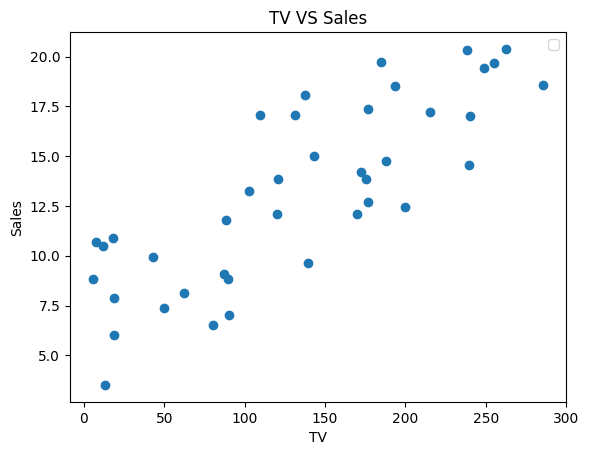

In [29]:
# Data Visualization
plt.scatter(x_test['TV'],y_prediction)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title("TV VS Sales")
plt.legend()




In [1]:
# Data Visualization
# Plot for Radio Vs Sales